In [9]:
from typing import List,TypedDict
from langgraph.graph import StateGraph
import math

In [10]:
class AgentState(TypedDict):
    name: str
    age:int
    skills:List[str]

In [11]:
def describe_name(state:AgentState) -> AgentState:
    """Describe the name of the agent."""
    state['name'] = f"Agent {state['name']}"
    return state

In [12]:
def describe_age(state:AgentState) -> AgentState:
    """Describe the age of the agent."""
    state['age'] = f"{state['age']} years old"
    return state

In [13]:
def describe_skills(state:AgentState) -> AgentState:
    """Describe the skills of the agent."""
    state['skills'] = [f"Skill: {skill}" for skill in state['skills']]
    return state

In [14]:
graph = StateGraph(AgentState)

In [15]:
graph.add_node("name_description", describe_name)
graph.add_node("age_description", describe_age)
graph.add_node("skills_description", describe_skills)
graph.add_edge("name_description", "age_description")
graph.add_edge("age_description", "skills_description")
graph.set_entry_point("name_description")
graph.set_finish_point("skills_description")

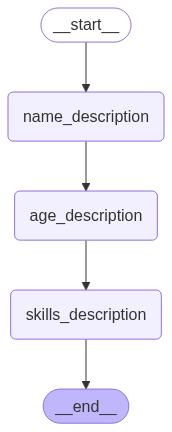

In [17]:
app=graph.compile()
app

In [19]:
result=app.invoke(
    {
        "name": "John",
        "age": 30,
        "skills": ["Python", "Machine Learning"]
    }
)

In [20]:
result

{'name': 'Agent John',
 'age': '30 years old',
 'skills': ['Skill: Python', 'Skill: Machine Learning']}